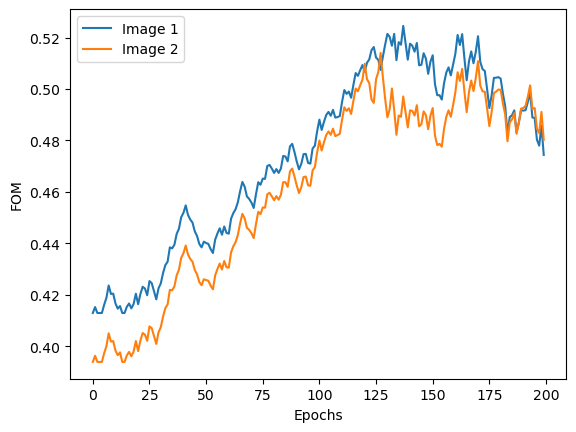

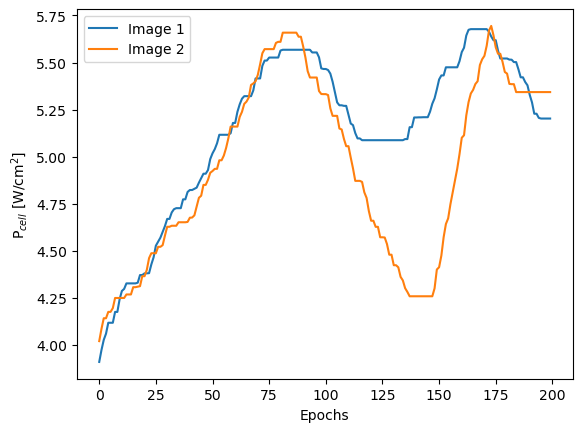

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re

fom_files = sorted(glob.glob('FOM_image_*.csv'))
for i, fom_file in enumerate(fom_files):
    fom_data = np.loadtxt(fom_file)
    plt.plot(fom_data, label = f'Image {i+1}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('FOM')
plt.show()

power_files = sorted(glob.glob('power_image_*.csv'))
for i, power_file in enumerate(power_files):
    power_data = np.loadtxt(power_file)
    plt.plot(power_data, label = f'Image {i+1}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('P$_{cell}$ [W/cm$^2$]')
plt.show()

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Parameters
num_images = 2          # Number of images
num_epochs = 100       # Number of epochs
permittivity_folder = '.'  # Folder where .npy files are stored
output_folder = 'heatmaps'  # Folder to save heatmap images

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Optional: Select specific epochs to visualize (e.g., every 10 epochs)
# epochs_to_plot = list(range(0, num_epochs, 10)) + [num_epochs-1]
# Uncomment the above line and comment the next line to use specific epochs
epochs_to_plot = range(num_epochs)

# Iterate through each epoch and image
for epoch in tqdm(epochs_to_plot, desc='Epochs'):
    for image in range(num_images):
        filename = os.path.join(permittivity_folder, f"permittivity_iteration_{epoch}_image_{image}.npy")
        
        if os.path.exists(filename):
            # Load the permittivity grid
            permittivity = np.load(filename)
            
            # Create the heatmap
            plt.figure(figsize=(6, 5))
            plt.imshow(permittivity, cmap='viridis', aspect='auto', origin='lower')
            plt.colorbar(label='Permittivity')
            plt.title(f"Image {image} \ Epoch {epoch}")
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.tight_layout()
            
            # Generate a filesystem-friendly filename based on the title
            # Replace backslash and other problematic characters with underscores
            title = f"Image {image} \ Epoch {epoch}"
            safe_title = title.replace('\\', '_').replace(' ', '_')  # Replace backslash and spaces
            safe_title = ''.join(c for c in safe_title if c.isalnum() or c in ('_', '-'))  # Remove other special chars
            save_filename = os.path.join(output_folder, f"{safe_title}.png")
            
            # Save the heatmap to the file
            plt.savefig(save_filename)
            plt.close()
            
            print(f"Saved heatmap: {save_filename}")
        else:
            print(f"Warning: File {filename} does not exist.")


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Saved heatmap: heatmaps/Image_0___Epoch_0.png
Saved heatmap: heatmaps/Image_1___Epoch_0.png
Saved heatmap: heatmaps/Image_0___Epoch_1.png
Saved heatmap: heatmaps/Image_1___Epoch_1.png
Saved heatmap: heatmaps/Image_0___Epoch_2.png
Saved heatmap: heatmaps/Image_1___Epoch_2.png
Saved heatmap: heatmaps/Image_0___Epoch_3.png
Saved heatmap: heatmaps/Image_1___Epoch_3.png
Saved heatmap: heatmaps/Image_0___Epoch_4.png
Saved heatmap: heatmaps/Image_1___Epoch_4.png
Saved heatmap: heatmaps/Image_0___Epoch_5.png
Saved heatmap: heatmaps/Image_1___Epoch_5.png
Saved heatmap: heatmaps/Image_0___Epoch_6.png
Saved heatmap: heatmaps/Image_1___Epoch_6.png


In [ ]:
import cv2
import numpy as np
from collections import Counter

# Load the image
image_path = '/Screenshot 2024-11-06 at 10.41.37 PM.png'
image = cv2.imread(image_path)

# Convert the image to RGB (OpenCV loads in BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the dimensions of the image
height, width, _ = image_rgb.shape

# Number of bars in the image
num_bars = 100

# Calculate the height of each bar
bar_height = height // num_bars

# Function to get the dominant color in a region
def get_dominant_color(region):
    # Reshape the region to a list of pixels
    pixels = region.reshape(-1, 3)
    # Count each color's occurrence and find the most common one
    counts = Counter(map(tuple, pixels))
    dominant_color = counts.most_common(1)[0][0]
    return dominant_color

# Define the color boundaries (adjust based on the image)
purple_range = ((100, 0, 100), (160, 50, 160))  # Purple color range in RGB
yellow_range = ((200, 200, 0), (255, 255, 100))  # Yellow color range in RGB

# Function to determine if color falls within a certain range
def is_color_in_range(color, color_range):
    return all(color_range[0][i] <= color[i] <= color_range[1][i] for i in range(3))

# Analyze each bar and determine its color
color_sequence = []
for i in range(num_bars):
    # Extract the region corresponding to the current bar
    bar_region = image_rgb[i * bar_height:(i + 1) * bar_height, :]
    dominant_color = get_dominant_color(bar_region)
    
    # Determine if the color is purple or yellow
    if is_color_in_range(dominant_color, purple_range):
        color_sequence.append("purple")
    elif is_color_in_range(dominant_color, yellow_range):
        color_sequence.append("yellow")
    else:
        color_sequence.append("unknown")  # In case it's neither

# Print or return the color sequence
print(color_sequence)


[ WARN:0@0.042] global loadsave.cpp:248 findDecoder imread_('/mnt/data/Screenshot 2024-11-06 at 10.41.37 PM.png'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [2]:
import random
import csv
import pandas as pd  # Optional: For displaying the CSV content within the notebook

# Set a random seed for reproducibility (optional)
random.seed(42)

# Define parameters
total_length = 200

# Start value around 4
start_value = random.uniform(3.8, 4.2)

# First peak at a random index around 90
peak1_index = random.randint(85, 95)

# Second peak at a random index around either 130 or 170 iterations
peak2_possible_indices = [random.randint(125, 135), random.randint(165, 175)]
peak2_index = random.choice(peak2_possible_indices)
peak2_index = min(peak2_index, total_length - 1)  # Ensure it's within bounds

# Ensure peak2_index is sufficiently after peak1_index
if peak2_index <= peak1_index + 10:
    peak2_index = peak1_index + 10

# Peaks at values around 5.6, with the second peak higher than the first
peak1_value = random.uniform(5.5, 5.7)
peak2_value = random.uniform(peak1_value + 0.1, 5.8)

# End value around 5.3
end_value = random.uniform(5.2, 5.4)

# Trough between peaks
trough_index = random.randint(peak1_index + 5, peak2_index - 5)
trough_value = random.uniform(start_value, peak1_value - 0.2)

# Segment lengths
segment1_length = peak1_index + 1  # Indices 0 to peak1_index inclusive
segment2_length = peak2_index - peak1_index  # Indices peak1_index+1 to peak2_index inclusive
segment3_length = total_length - peak2_index - 1  # Indices peak2_index+1 to total_length -1

# Sub-segments within Segment 2
subsegment2a_length = trough_index - peak1_index  # Decreasing part
subsegment2b_length = peak2_index - trough_index  # Increasing part

# Initialize the list with the start value
floats = [round(start_value, 4)]
current_value = start_value

# Generate Segment 1: Increasing to first peak
increase_per_step1 = (peak1_value - start_value) / (segment1_length - 1)

for i in range(1, peak1_index + 1):
    increment = increase_per_step1 + random.uniform(-0.05, 0.05)
    current_value += increment
    current_value = max(floats[-1], min(current_value, peak1_value))
    floats.append(round(current_value, 4))

# Generate Sub-segment 2a: Decreasing to trough
decrease_per_step2a = (peak1_value - trough_value) / subsegment2a_length

for i in range(subsegment2a_length):
    decrement = decrease_per_step2a + random.uniform(-0.05, 0.05)
    current_value -= decrement
    current_value = max(trough_value, min(current_value, floats[-1]))
    floats.append(round(current_value, 4))

# Generate Sub-segment 2b: Increasing to second peak
increase_per_step2b = (peak2_value - trough_value) / subsegment2b_length

for i in range(subsegment2b_length):
    increment = increase_per_step2b + random.uniform(-0.05, 0.05)
    current_value += increment
    current_value = max(floats[-1], min(current_value, peak2_value))
    floats.append(round(current_value, 4))

# Generate Segment 3: Decreasing to end value
segment3_indices = total_length - len(floats)

if segment3_indices > 0:
    decrease_per_step3 = (peak2_value - end_value) / segment3_indices

    for i in range(segment3_indices):
        decrement = decrease_per_step3 + random.uniform(-0.05, 0.05)
        current_value -= decrement
        current_value = max(end_value, min(current_value, floats[-1]))
        floats.append(round(current_value, 4))

# If we have fewer than total_length values, pad with end_value
while len(floats) < total_length:
    floats.append(round(end_value, 4))

# Verify the length of the list
assert len(floats) == total_length, f"Expected {total_length} floats, got {len(floats)}."

# Write the floats to a CSV file
csv_filename = 'floats.csv'
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Optionally, write a header
    writer.writerow(['Float Values'])
    # Write each float on a new line
    for value in floats:
        writer.writerow([value])

print(f"Successfully wrote {total_length} floats to '{csv_filename}'.")

# Display a preview of the generated floats
print("\nPreview of Generated Floats:")
print(f"Start Value (Index 0): {floats[0]}")
print(f"First Peak at Index {peak1_index}: {floats[peak1_index]}")
print(f"Trough at Index {trough_index}: {floats[trough_index]}")
print(f"Second Peak at Index {peak2_index}: {floats[peak2_index]}")
print(f"End Value (Index {total_length - 1}): {floats[-1]}\n")

# Display the first and last 10 values
print("First 10 Values:")
for index in range(10):
    print(f"Index {index}: {floats[index]}")

print("\nLast 10 Values:")
for index in range(total_length - 10, total_length):
    print(f"Index {index}: {floats[index]}")

# Optional: Display the CSV content using pandas
# Uncomment the following lines if you want to see the CSV content within the notebook

# df = pd.read_csv(csv_filename)
# display(df.head(15))  # Display first 15 rows
# display(df.tail(15))  # Display last 15 rows


Successfully wrote 200 floats to 'floats.csv'.

Preview of Generated Floats:
Start Value (Index 0): 4.0558
First Peak at Index 85: 5.5279
Trough at Index 124: 4.1664
Second Peak at Index 129: 5.6422
End Value (Index 199): 5.3481

First 10 Values:
Index 0: 4.0558
Index 1: 4.0653
Index 2: 4.0653
Index 3: 4.0653
Index 4: 4.0832
Index 5: 4.0832
Index 6: 4.0832
Index 7: 4.1155
Index 8: 4.1373
Index 9: 4.1373

Last 10 Values:
Index 190: 5.3481
Index 191: 5.3481
Index 192: 5.3481
Index 193: 5.3481
Index 194: 5.3481
Index 195: 5.3481
Index 196: 5.3481
Index 197: 5.3481
Index 198: 5.3481
Index 199: 5.3481


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Parameters
num_images = 2          # Number of images
num_epochs = 100       # Number of epochs
permittivity_folder = '.'  # Folder where .npy files are stored
output_folder = 'heatmaps'  # Folder to save heatmap images

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Optional: Select specific epochs to visualize (e.g., every 10 epochs)
# epochs_to_plot = list(range(0, num_epochs, 10)) + [num_epochs-1]
# Uncomment the above line and comment the next line to use specific epochs
epochs_to_plot = range(num_epochs)

# Iterate through each epoch and image
for epoch in tqdm(epochs_to_plot, desc='Epochs'):
    for image in range(num_images):
        filename = os.path.join(permittivity_folder, f"permittivity_iteration_{epoch}_image_{image}.npy")
        
        if os.path.exists(filename):
            # Load the permittivity grid
            permittivity = np.load(filename)
            
            # Create the heatmap
            plt.figure(figsize=(6, 5))
            plt.imshow(permittivity, cmap='viridis', aspect='auto', origin='lower')
            plt.colorbar(label='Permittivity')
            plt.title(f"Image {image} \ Epoch {epoch}")
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.tight_layout()
            
            # Generate a filesystem-friendly filename based on the title
            # Replace backslash and other problematic characters with underscores
            title = f"Image {image} \ Epoch {epoch}"
            safe_title = title.replace('\\', '_').replace(' ', '_')  # Replace backslash and spaces
            safe_title = ''.join(c for c in safe_title if c.isalnum() or c in ('_', '-'))  # Remove other special chars
            save_filename = os.path.join(output_folder, f"{safe_title}.png")
            
            # Save the heatmap to the file
            plt.savefig(save_filename)
            plt.close()
            
            print(f"Saved heatmap: {save_filename}")
        else:
            print(f"Warning: File {filename} does not exist.")


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Saved heatmap: heatmaps/Image_0___Epoch_0.png
Saved heatmap: heatmaps/Image_1___Epoch_0.png
Saved heatmap: heatmaps/Image_0___Epoch_1.png
Saved heatmap: heatmaps/Image_1___Epoch_1.png
Saved heatmap: heatmaps/Image_0___Epoch_2.png
Saved heatmap: heatmaps/Image_1___Epoch_2.png
Saved heatmap: heatmaps/Image_0___Epoch_3.png
Saved heatmap: heatmaps/Image_1___Epoch_3.png
Saved heatmap: heatmaps/Image_0___Epoch_4.png
Saved heatmap: heatmaps/Image_1___Epoch_4.png
Saved heatmap: heatmaps/Image_0___Epoch_5.png
Saved heatmap: heatmaps/Image_1___Epoch_5.png
Saved heatmap: heatmaps/Image_0___Epoch_6.png
Saved heatmap: heatmaps/Image_1___Epoch_6.png


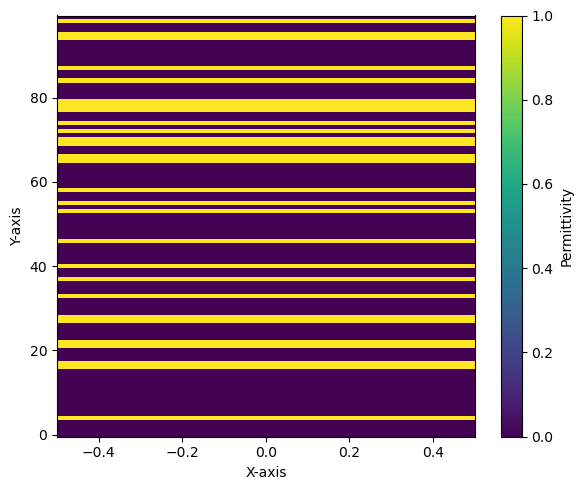

In [55]:
import matplotlib.pyplot as plt
y = [[1] for x in range(100)]
zeros = [1,3,4,7,8,9,10,11,12,14,15,17,18,19,20,24,25,27,29,32,33,36,37,38,39,40,41,43,44,46,48,49,50,51,52,53,55,56,57,58,59,61,62,64,65,66,68,69,70,71,74,75,76,77,80,81,82,85,86,87,88,89,90,91,92,93,94,95,97,98,99,100]
for i in zeros:
    y[-i]=[0]
plt.figure(figsize=(6, 5))
plt.imshow(y, cmap='viridis', aspect='auto', origin='lower')
plt.colorbar(label='Permittivity')
# plt.title(f"Image {image} \ Epoch {epoch}")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.tight_layout()